## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/zomato.csv',encoding="ISO-8859-1")

In [3]:
data.head()


,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",1500,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",1500,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:
country = pd.read_excel("../input/Country-Code.xlsx")
country.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


## Merding both the dataframes on the common attribute that is **Country Code** . 

In [5]:
data1 = pd.merge(data, country, on='Country Code')
data1.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",1100,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314,Phillipines
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,1200,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591,Phillipines
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",4000,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270,Phillipines


# Existence of zomato over the globe except India

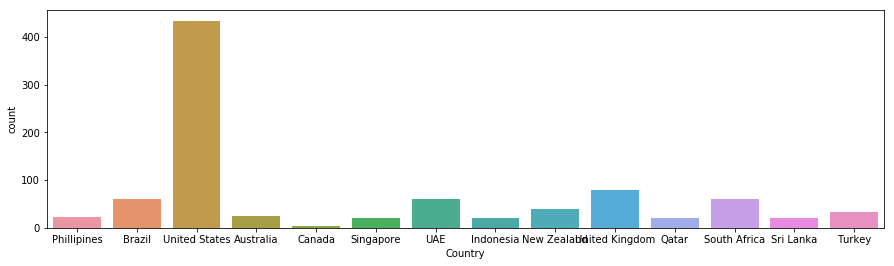

In [6]:
fig,ax = plt.subplots(1,1,figsize = (15,4))
ax = sns.countplot(data1[data1.Country != 'India']['Country'])
plt.show()

### Amongst these countries Zomato is most popular in United States and least popular in Canada

# Zomato in India

In [7]:
res_India = data1[data1.Country == 'India']
res_India.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
624,3400025,Jahanpanah,1,Agra,"E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",78.011544,27.161661,"North Indian, Mughlai",850,Indian Rupees(Rs.),No,No,No,No,3,3.9,Yellow,Good,140,India
625,3400341,Rangrezz Restaurant,1,Agra,"E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...",Agra Cantt,"Agra Cantt, Agra",0.000000,0.000000,"North Indian, Mughlai",700,Indian Rupees(Rs.),No,No,No,No,2,3.5,Yellow,Good,71,India
626,3400005,Time2Eat - Mama Chicken,1,Agra,"Main Market, Sadar Bazaar, Agra Cantt, Agra",Agra Cantt,"Agra Cantt, Agra",78.011608,27.160832,North Indian,500,Indian Rupees(Rs.),No,No,No,No,2,3.6,Yellow,Good,94,India


## Top 5 cities in India where maximum number of restaurants are registered on zomato

In [8]:
top5 = res_India.City.value_counts().head()
top5

New Delhi    5473
Gurgaon      1118
Noida        1080
Faridabad     251
Ghaziabad      25
Name: City, dtype: int64

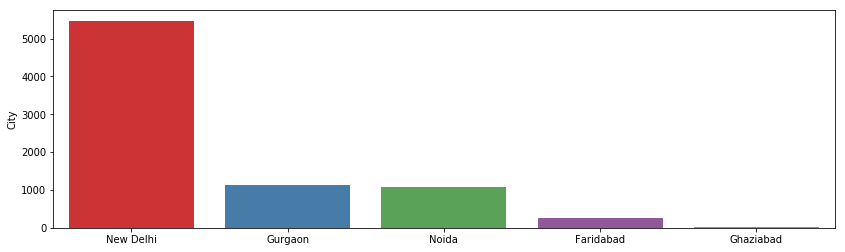

In [9]:
f , ax = plt.subplots(1,1,figsize = (14,4))
ax = sns.barplot(top5.index,top5,palette ='Set1')
plt.show()

# Majority of the orders are from 
-  New Delhi
-  Gurgaon
-  Noida 
- .Faridabad

**So we will focus on these cities**

In [10]:
NCR = ['New Delhi','Gurgaon','Noida','Faridabad']
res_NCR = res_India[(res_India.City == NCR[0])|(res_India.City == NCR[1])|(res_India.City == NCR[2])|
                    (res_India.City == NCR[3])]
res_NCR.head(3)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",250,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4,India
866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16,India
867,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,150,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,8,India


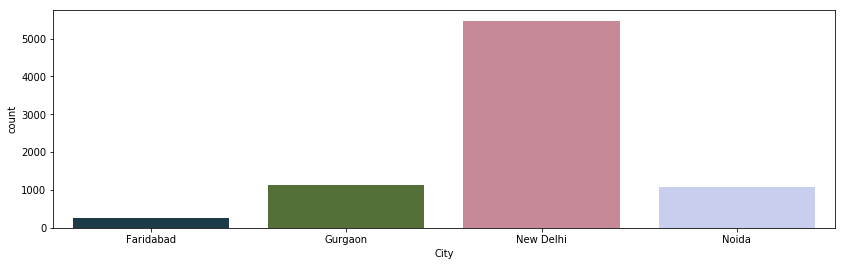

In [11]:
f,ax = plt.subplots(1,1,figsize = (14,4))
sns.countplot(res_NCR.City,palette ='cubehelix')
plt.show()

## Only 1046 restaurants in NCR provides Table booking facility

No     6876
Yes    1046
Name: Has Table booking, dtype: int64


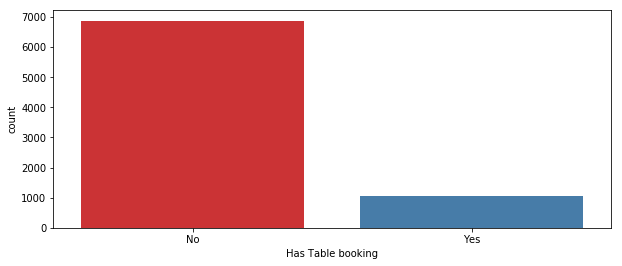

In [12]:
print(res_NCR['Has Table booking'].value_counts())
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax = sns.countplot(res_NCR['Has Table booking'],palette= 'Set1')
plt.show()

# Around 41% of the restaurants in the NCR provides Online Delivery service 

###  This percentage is very low as in the time of growing technology people want to save their time by ordering the food online and spending the time in other works instead of going to restaurants especially in Delhi NCR. Restaurants can maximize their business by providing online delivery services to the customers.


No     5609
Yes    2313
Name: Has Online delivery, dtype: int64


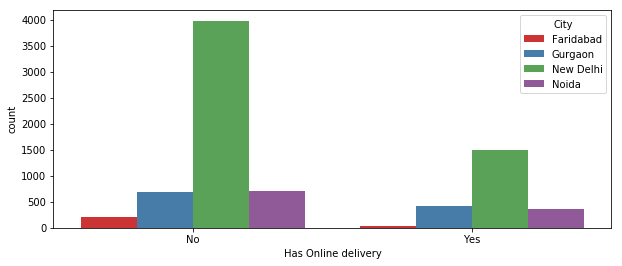

In [13]:
print(res_NCR['Has Online delivery'].value_counts())
fig,ax = plt.subplots(1,1,figsize=(10,4))
ax = sns.countplot(res_NCR['Has Online delivery'],hue = res_NCR['City'],palette ='Set1')
plt.show()

# Around 44% of the total restaurants in NCR provides average quality of food, 25% of them are not rated ,19% of them provides good food , 5% provides Very good food and just 3% of them provides poor food quality.

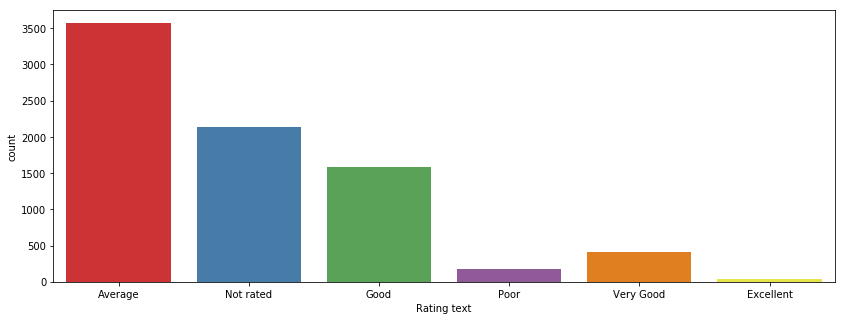

In [14]:
f, ax = plt.subplots(1,1, figsize = (14, 5))
ax = sns.countplot(res_NCR['Rating text'],palette ='Set1')
plt.show()

# Price range of the restaurants varies from 1(Cheapest) - 4(Most Expensive)

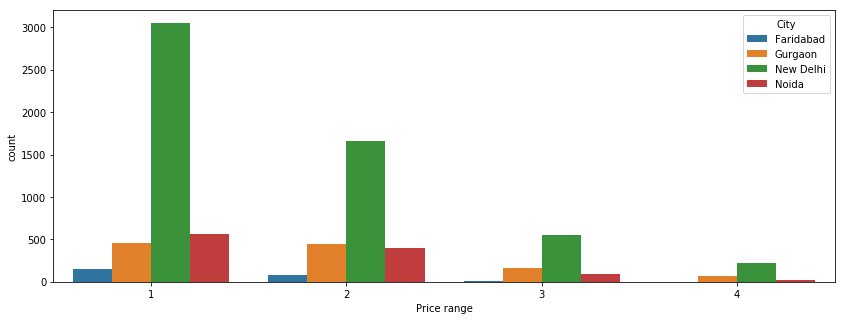

In [15]:
f, ax = plt.subplots(1,1, figsize = (14, 5))
ax = sns.countplot(res_NCR['Price range'],hue = res_NCR['City'])
plt.show()

# Number of restaurants in NCR with aggregate rating ranging from 1.9 to 4.9

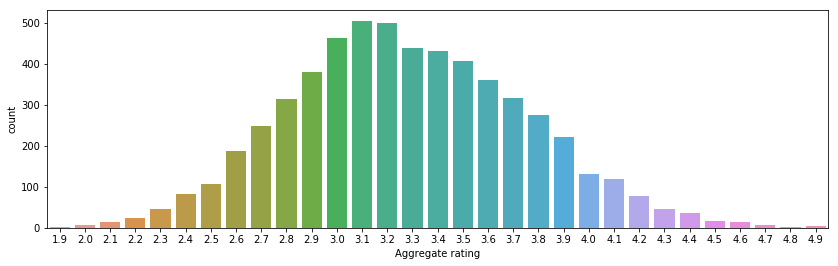

In [16]:
agg_rat = res_NCR[res_NCR['Aggregate rating'] > 0]
f, ax = plt.subplots(1,1, figsize = (14, 4))
ax = sns.countplot(agg_rat['Aggregate rating'])
plt.show()

### Most of the restaurants have aggregate  rating  ranging from 2.8 to 3.8

## Top 5 Places in New Delhi with restaurants having aggregate rating over 4

In [17]:
res_NCR[(res_NCR.City == 'New Delhi') & (res_NCR['Aggregate rating'] >=4 )]['Locality'].value_counts().head()

Connaught Place           32
Rajouri Garden            24
Greater Kailash (GK) 1    17
Satyaniketan              15
Khan Market               14
Name: Locality, dtype: int64

# Places in gurgaon best for Dinner dates

In [18]:
res_NCR[(res_NCR['City']=='Gurgaon') & (res_NCR['Aggregate rating']> 4) & (res_NCR['Votes'] > 1000) 
& (res_NCR['Rating text'] =='Excellent')]

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
1464,303960,Manhattan Brewery & Bar Exchange,1,Gurgaon,"1st Floor, Global Foyer Mall, Sector 43, Golf ...","Global Foyer Mall, Golf Course Road","Global Foyer Mall, Golf Course Road, Gurgaon",77.095027,28.460271,"Finger Food, American, Continental, North Indi...",2000,Indian Rupees(Rs.),No,No,No,No,4,4.6,Dark Green,Excellent,2093,India
1839,18337894,Prankster,1,Gurgaon,"Site 8-10, Sector 29, Gurgaon",Sector 29,"Sector 29, Gurgaon",77.063357,28.469166,"Modern Indian, North Indian",1500,Indian Rupees(Rs.),Yes,No,No,No,3,4.8,Dark Green,Excellent,1478,India
2099,7528,Indian Grill Room,1,Gurgaon,"315, 3rd Floor, Suncity Business Tower, Golf C...","Suncity Business Tower, Golf Course Road","Suncity Business Tower, Golf Course Road, Gurgaon",77.105277,28.433457,"North Indian, Mughlai",1800,Indian Rupees(Rs.),Yes,Yes,No,No,3,4.5,Dark Green,Excellent,1262,India


# Variety Cuisines in Delhi NCR

In [19]:
res_NCR.reset_index(inplace=True)
res_NCR.head(3)

,index,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes,Country
0,865,301728,Desire Foods,1,Faridabad,"G 25/22, Main Road, 40 Feet, Molarband Extensi...",Badarpur Border,"Badarpur Border, Faridabad",77.306640,28.490059,"Chinese, Fast Food, Bakery",250,Indian Rupees(Rs.),No,No,No,No,1,2.9,Orange,Average,4,India
1,866,5992,Knight Rock,1,Faridabad,"11/6, Delhi Mathura Road, Near Bharat Petrol P...",Badarpur Border,"Badarpur Border, Faridabad",77.304776,28.490157,"North Indian, Chinese",500,Indian Rupees(Rs.),No,No,No,No,2,2.8,Orange,Average,16,India
2,867,301730,Punjab Restaurant,1,Faridabad,"Main 40 Feet Road, Molarband Extension, Badarp...",Badarpur Border,"Badarpur Border, Faridabad",77.305563,28.490137,North Indian,150,Indian Rupees(Rs.),No,No,No,No,1,2.8,Orange,Average,8,India


In [20]:
cuisines = {"North Indian":0,'Chinese':0,'Fast Food':0,'Mughlai':0,'Bakery':0,'Continental':0,'Italian':0,
           "South Indian":0,'Cafe':0,'Desserts':0,'Street Food':0,'Mithai':0,'Pizza':0,'American':0,'Ice Cream':0}

for i in range(len(res_NCR.Cuisines)):
    for j in res_NCR.loc[i,'Cuisines'].split(','):
        if  j in cuisines.keys():
            cuisines[j] +=1
print(cuisines)

{'North Indian': 2750, 'Chinese': 781, 'Fast Food': 629, 'Mughlai': 201, 'Bakery': 603, 'Continental': 176, 'Italian': 139, 'South Indian': 236, 'Cafe': 451, 'Desserts': 118, 'Street Food': 229, 'Mithai': 245, 'Pizza': 186, 'American': 123, 'Ice Cream': 172}


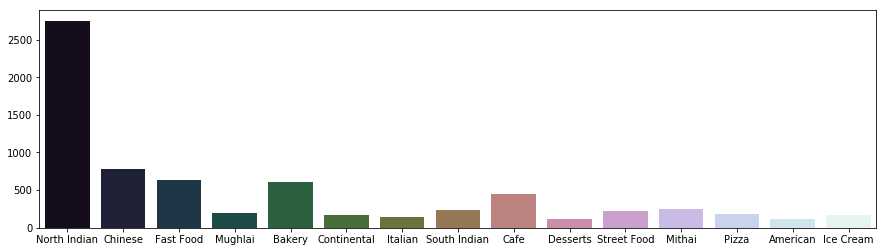

In [21]:
f, ax = plt.subplots(1,1, figsize = (15, 4))
ax = sns.barplot(x = list(cuisines.keys()),y=list(cuisines.values()),palette='cubehelix')
plt.show()

## We can clearly see that most of the restaurants provides North Indian Cuisines which is most popular all over India and other delicious cuisines including Mughlai, South Indian, Chinese , Italian and a lot more. 

# Price range increases with the aggregate rating of the customers

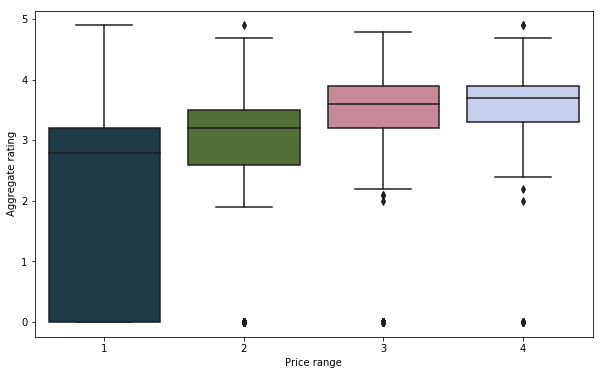

In [22]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
ax  = sns.boxplot(x='Price range',y = 'Aggregate rating',data=res_NCR,palette='cubehelix')
plt.show()

# End